# Cryptocurrency Price Prediction
This project uses tensorflow to forcast cryptocurrency price using LSTM (Long Short-Term Memory) Mechanism. 

## Step 1 - Install and import the required packages

In [ ]:
pip install pandas

In [ ]:
pip install seaborn==0.11.2

In [ ]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 5.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install yfinance==0.1.70

     |████████████████████████████████| 6.4 MB 8.2 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 5.7 MB/s 


In [ ]:
import yfinance as yf
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

## Step 5 - Predict Bitcoin Price using LSTM (Long Short-Term Memory) Mechanism

Long Short-Term Memory (LSTM) Recurrent Neural Networks are designed for sequence prediction problems and are a state-of-the-art deep learning technique for challenging prediction problems.

In [ ]:
ticker = 'BTC-USD'

In [ ]:
today = dt.datetime.now()
start = dt.datetime(2018, 1, 1,)
end = dt.date(today.year, today.month, today.day -10)

In [ ]:
#Get bitcoin complete data
btc_df = yf.download(tickers=ticker, start=start, end=end, interval='1d',)
btc_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [ ]:
#Check the lenght of the data
int(len(btc_df))

1589

### Train, Test and Validation Split


The Train, Test and Validation split is a technique for evaluating the performance of a machine learning algorithm.  

The train set is used to train the model. The model uses the training set to learn the features of the data. Later, the model will use what it learned from the training set to make prediction on a set of new data that it has not seen before (ie the test set).  

The Validation data is seperate from the traing set used to validate the model during traing. The validation set give information that may be used to adjust the hyper-parameters. The validation set is used to ensure that the model is not overfitting to the training set.

The model uses the test set make prediction based on what it has learned from the training set. The test set should not be labeled.   

In this model, we will use 20% of the traing data for validation. The parameter "validation_split=0.20" is passed in the model, so keras will use 20% of the trainig data for validation.


In [ ]:
#Use 80% of the dataframe as training size and 20% as test size
train_size = int(len(btc_df)*0.90)
test_size = len(btc_df) - train_size

In [ ]:
train_size, test_size

(1430, 159)

In [ ]:
print('older set of data:')
btc_df.head()

older set of data:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [ ]:
print('newer set of data:')
btc_df.tail()

newer set of data:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490
2022-05-05,39695.746094,39789.281250,35856.515625,36575.140625,36575.140625,43106256317
2022-05-06,36573.183594,36624.359375,35482.132812,36040.921875,36040.921875,37795577489
2022-05-07,36042.503906,36129.925781,34940.824219,35501.953125,35501.953125,24375896406
2022-05-08,35502.941406,35502.941406,33878.964844,34059.265625,34059.265625,36763041910


Quick note on Python slice notation for slicing an array.   

[1:3] = "from 1 to 3" (3 not included).  
[1:] = "1 to end".  
[len(df):] = "from length of df to end".  
[:] = "all the data"



In [ ]:
#Use index slicing to select the head/older set of data as traing set
df_train= btc_df[:len(btc_df)-test_size].values
df_train.shape

(1430, 6)

In [ ]:
#Use index slicing to select the tail/newer set of data as test set
df_test= btc_df[len(btc_df)-test_size:].values
df_test.shape

(159, 6)

Normalizing data between 0 & 1 

The MinMaxScaler transforms features by scaling each feature to a given range, in this case 0 and 1, while preserving the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. 

Normalizing data between 0 & 1 makes it easy for a model to learn and understand the problem. It makes sure that various features have similar value ranges (feature scaling) so that gradient descents can converge faster.

In [ ]:
#Using MinMaxScaler to normalize data between 0 & 1
train_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = train_scaler.fit_transform(df_train)

test_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_test = test_scaler.fit_transform(df_test)

In [ ]:
scaled_train.shape, scaled_test.shape

((1430, 6), (159, 6))

The LSTM input is required to be 3D ie samples, time_steps and features.  

Samples - the number of data point.  
Time Steps - One time step is one point of observation in the sample. That is the number of past days we want to use to predict the future. In this case, we defined it as the look_back_days ie 14.   
Features - One feature is one observation at a time step. In this case, 6 feature (the open, close, Adj Close, high, low and volumn of Bitcoin) per time step.

In the function generate_lstm defined below, the input data will be reformated from 2d: (samples, features) to a 3d shape: (samples, timesteps, n_features)

[*Reference*](https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/#:~:text=The%20LSTM%20input%20layer%20must,of%20time%20steps%20and%20features.)    
[Tips for LSTM Input](https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/#:~:text=Term%20Memory%20Networks-,Tips%20for%20LSTM%20Input,-This%20section%20lists)

In [ ]:
btc_df.shape

(1589, 6)

In [ ]:
#create dataset in time series for LSTM model 
def generate_lstm(scaled_data, look_back_days, future = 1):

  #Empty lists to be populated using formatted training data
  trainX = []
  trainY = []

  # look_back_days = Number of past days we want to use to predict the future.
  # future = Number of days in the future we want to look into based on the past days.

  #Reformat input data into a shape: (n_samples x timesteps x n_features)
  for i in range(look_back_days, len(scaled_data) - future +1):
      trainX.append(scaled_data[i - look_back_days:i, 0:btc_df.shape[1]])
      trainY.append(scaled_data[i + future - 1:i + future, 0])
      

  return np.array(trainX), np.array(trainY)

In [ ]:
#Taking 14 days price into one window
look_back_days = 10

The function generate_lstm() will split the data sequence into windows in a way that is acceptable for fitting the LSTM model and reformat x data to 3d.



In [ ]:
scaled_train.shape

(1430, 6)

In [ ]:
# splitting the scaled_train data into windows 
X_train, y_train = generate_lstm(scaled_train,look_back_days)

In [ ]:
#Check the shape of the data
X_train.shape, y_train.shape

((1420, 10, 6), (1420, 1))

In [ ]:
scaled_test.shape

(159, 6)

In [ ]:
# splitting the scaled_test data into windows 
X_test, y_test = generate_lstm(scaled_test,look_back_days)

In [ ]:
#Check the shape of the data
X_test.shape, y_test.shape

((149, 10, 6), (149, 1))

Create stacked LSTM model using keras.

Stacking LSTM hidden layers makes the model deeper, more accurately earning the description as a deep learning technique.   

It is the depth of neural networks that is generally attributed to the success of the approach on a wide range of challenging prediction problems.  

To stack LSTM layers, we need to change the configuration of the prior LSTM layer to output a 3D array as input for the subsequent layer.

We can do this by setting the return_sequences argument on the layer to True (defaults to False). This will return one output for each input time step and provide a 3D array.

Dropout layers randomly ignore some subset of nodes in a given layer during training. Drop out is used to prevent overfitting.

[Reference](https://machinelearningmastery.com/stacked-long-short-term-memory-networks/#:~:text=LSTMs%20in%20Keras-,Why%20Increase%20Depth%3F,range%20of%20challenging%20prediction%20problems.)

In [ ]:
# Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]), activation = 'relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 10, 64)            18176     
                                                                 
 dropout_24 (Dropout)        (None, 10, 64)            0         
                                                                 
 lstm_25 (LSTM)              (None, 10, 50)            23000     
                                                                 
 dropout_25 (Dropout)        (None, 10, 50)            0         
                                                                 
 lstm_26 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_26 (Dropout)        (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

After the model has been defined, next compile the model. An optimizer trys to minimize loss function as close to zero as possible. We would use adam optimizer and set loss function to mean squared error. Loss is the error between what the model is predicting as the y_value and what the y_value really is.

NOTE:  
LSTM training algorithm does not guarantee that accuracy will increase in every epoch. That's because it does not inspect accuracy to tweak the model's weights, instead it inspect training_loss to do it.  
[Reference](https://datascience.stackexchange.com/questions/49109/loss-val-loss-are-decreasing-but-accuracies-are-the-same-in-lstm)

In [ ]:
# compile the model
model.compile(loss='mean_squared_error',optimizer='adam')

20% of the training is used to validate the model.
A single pass of the data through a model is called an epoch. In this model, the data will be passed through the model 100 times.

In [ ]:
#train the model
model.fit(X_train,y_train,validation_split=0.20,epochs=50,batch_size=15)

Epoch 1/50
76/76 [==============================] - 14s 38ms/step - loss: 0.0029 - val_loss: 0.0061
Epoch 2/50
76/76 [==============================] - 2s 23ms/step - loss: 8.8607e-04 - val_loss: 0.0086
Epoch 3/50
76/76 [==============================] - 2s 22ms/step - loss: 6.3016e-04 - val_loss: 0.0050
Epoch 4/50
76/76 [==============================] - 2s 23ms/step - loss: 6.8973e-04 - val_loss: 0.0037
Epoch 5/50
76/76 [==============================] - 2s 22ms/step - loss: 6.3664e-04 - val_loss: 0.0108
Epoch 6/50
76/76 [==============================] - 2s 21ms/step - loss: 6.4623e-04 - val_loss: 0.0147
Epoch 7/50
76/76 [==============================] - 2s 21ms/step - loss: 6.4266e-04 - val_loss: 0.0127
Epoch 8/50
76/76 [==============================] - 2s 22ms/step - loss: 7.8672e-04 - val_loss: 0.0200
Epoch 9/50
76/76 [==============================] - 2s 22ms/step - loss: 6.2614e-04 - val_loss: 0.0037
Epoch 10/50
76/76 [==============================] - 2s 22ms/step - loss: 5.

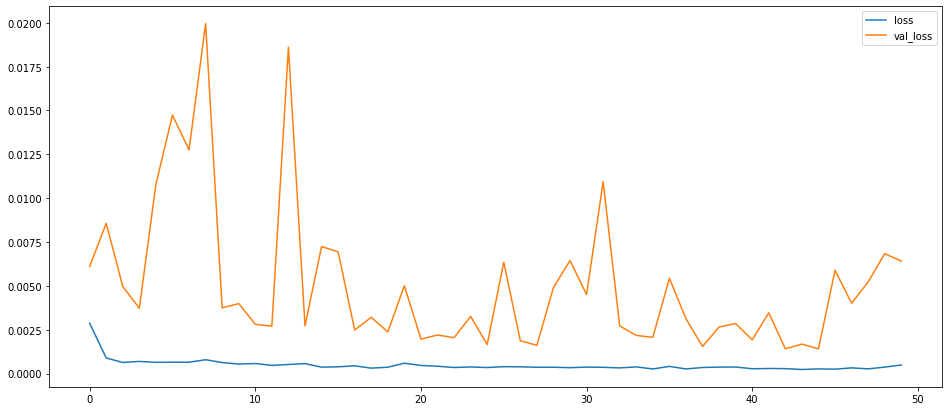

In [ ]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
plt.figure(figsize=(16,7))
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.plot(loss, label='loss')
plt.plot(val_loss,label='val_loss')
plt.legend(loc='upper right')
plt.show()

The LSTM model will use what it has learned from the trainig set to make predictions on the test set. Only the input data (x) will be passed (ie without the label).

In [ ]:
X_test.shape, y_test.shape

((149, 10, 6), (149, 1))

In [ ]:
# Making the predictions on test data
predicted_btc_price = model.predict(X_test)

Perform inverse transformation to rescale back to original range.   
Since we used 6 variables for transform, the inverse expects same dimensions.   
Therefore, the predicted_btc_price values will be copied 6 times and discard them after inverse transform.

In [ ]:
#make 6 copies of the predicted_btc_price
prediction_copies = np.repeat(predicted_btc_price, X_test.shape[2], axis=-1)

In [ ]:
# Transform data to the original form 
predicted_btc_price = test_scaler.inverse_transform(prediction_copies)[:,0]

In [ ]:
X_test.shape

(149, 10, 6)

In [ ]:
y_test.shape

(149, 1)

In [ ]:
#make 6 copies of the train label
train_label = np.repeat(y_test, X_test.shape[2], axis=-1)

# Transform data to the original form 
actual_btc_price = test_scaler.inverse_transform(train_label)[:,0]


In [ ]:
# Check the shape
actual_btc_price.shape, predicted_btc_price.shape

((149,), (149,))

Plot the actual bitcoin price and the predicted price to visualize the result.

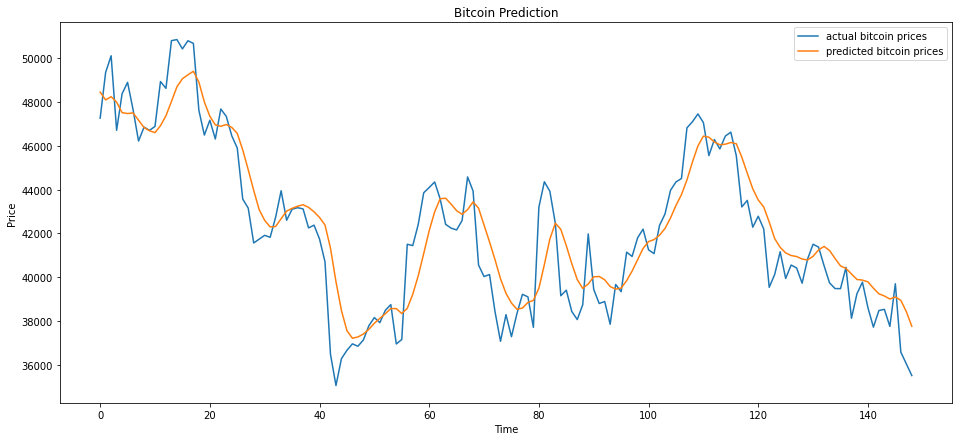

In [ ]:
#visualize the result
plt.figure(figsize=(16,7))
plt.plot(actual_btc_price, label='actual bitcoin prices')
plt.plot(predicted_btc_price, label='predicted bitcoin prices')
plt.title('Bitcoin Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()

### Predict Next 10 days

Here we will use the model to predict what the price of bitcoin will likely be in the next 10 days.   
The time step has been defined as 10. So the model will look at

In [ ]:
X_test.shape

(149, 10, 6)

In [ ]:
#set the days to predict
days_to_predict = 10

#use index slicing to select the last 10 days of the test set
last_days = X_test[X_test.shape[0] - days_to_predict :  ]
last_days.shape

(10, 10, 6)

In [ ]:
future_forecast = []

for i in range(10):  
  predicted_days = model.predict(last_days[i:i+1])
  predicted_days = np.repeat(predicted_days, X_test.shape[2], axis=-1)
  predicted_days = test_scaler.inverse_transform(predicted_days)[:,0]

  future_forecast.append(predicted_days)

future_forecast is forecast for the next 10 Days Beyond the actual trading days

In [ ]:
future_forecast

[array([39862.797], dtype=float32),
 array([39783.95], dtype=float32),
 array([39494.24], dtype=float32),
 array([39236.918], dtype=float32),
 array([39138.188], dtype=float32),
 array([38999.973], dtype=float32),
 array([39094.957], dtype=float32),
 array([38938.15], dtype=float32),
 array([38422.805], dtype=float32),
 array([37754.883], dtype=float32)]

In [ ]:
# convert future_forecast to a single array
future_forecast = np.array(future_forecast)
future_forecast

array([[39862.797],
       [39783.95 ],
       [39494.24 ],
       [39236.918],
       [39138.188],
       [38999.973],
       [39094.957],
       [38938.15 ],
       [38422.805],
       [37754.883]], dtype=float32)

In [ ]:
#confirm the shape
future_forecast.shape

(10, 1)

In [ ]:
# check the shape of the predicted_btc_price
predicted_btc_price.shape

(149,)

To successfully visualize, both data should have the same dimention. Therefore, the flatten function will be used to flatten both data.

In [ ]:
# flatten future_forecast array
future_forecast = future_forecast.flatten()
future_forecast.shape

(10,)

In [ ]:
# flatten predicted_btc_price array
predicted_btc_price = predicted_btc_price.flatten()
predicted_btc_price.shape

(149,)

In [ ]:
#concatenate both data
concat_test_df = np.concatenate((predicted_btc_price, future_forecast))
concat_test_df.shape

(159,)

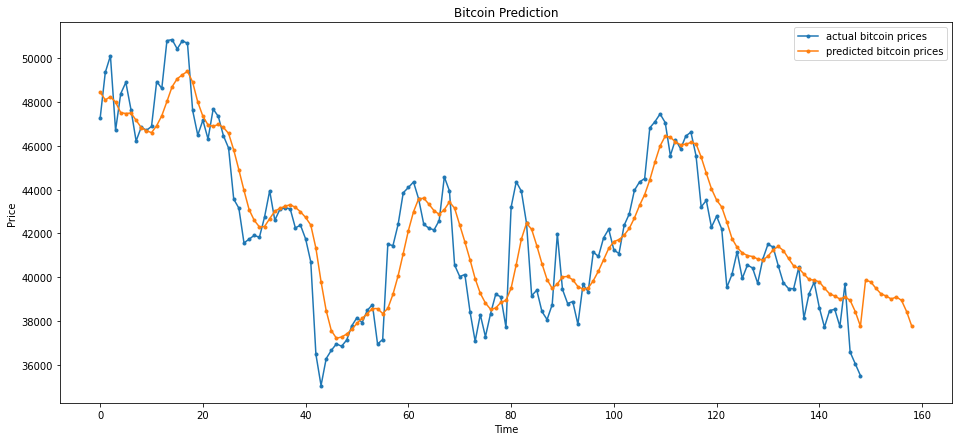

In [ ]:
#visualize the prediction result
plt.figure(figsize=(16,7))
plt.plot(actual_btc_price, marker='.', label='actual bitcoin prices')
plt.plot(concat_test_df, marker='.', label='predicted bitcoin prices')
plt.title('Bitcoin Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()